# Case study: 10+K qubit QCP architecture exploration

This notebook aims to introduce case studies using XQsim, exploring four quantum control processor (QCP) architectures. As we have been polishing our tool, detailed values can differ from our conference paper, but observations and conclusions are consistent. 

## Import

In [1]:
import os, sys
curr_dir = os.getcwd()
src_dir = os.path.join(curr_dir, "src")
sys.path.insert(0, src_dir)

from gen_single_esm import gen_single_esm
from xqsim import xqsim
from visualization import draw_simres_scaling

framework = xqsim()

## Index

* 0. Methodology
* 1. Current system with 300K CMOS
* 2. Near-future system with 4K CMOS
* 3. Near-future system with 4K RSFQ
* 4. Future system with 4K ERSFQ

## 0. Methodology

This case study explores four QCP architectures corresponding to the configurations (1) current_300K_CMOS, (2) nearfuture_4K_CMOS, (3) nearfuture_4K_RSFQ, and (4) future_4K_ERSFQ. For the scalability analysis, we run the single ESM while increasing the target qubit scale (i.e., number of logical qubits). 

### Note
* Scalability analysis is conducted with the maximum values, not with the average values.
* We intentionally use the same cycle-level simulation stats for every configuration (consistent analysis).


### Target QCP architectures (Configurations)
* Please check the corresponding configuration files (*.json) at ```./src/configs/```.

![ex_screenshot](./figures/target_configs.png)

### Workload (Single ESM)

In [2]:
target_lq_list = [5, 7, 11, 21]

qbin_list = []
for lq in target_lq_list:
    qbin_list.append(gen_single_esm(lq))
    
print(qbin_list)

GSC-compiler: ASSEMBLE - esm_n3
GSC-compiler: ASSEMBLE - esm_n5
GSC-compiler: ASSEMBLE - esm_n9
GSC-compiler: ASSEMBLE - esm_n19
['esm_n3', 'esm_n5', 'esm_n9', 'esm_n19']


## 1. Current system with 300K CMOS
* **Configuration - current_300K_CMOS**

### Run XQsim

In [3]:
config = "current_300K_CMOS"

simres_list = []
for qbin in qbin_list:
    framework.setup(config = config, 
                    qbin = qbin,
                    num_shots = 0, 
                    dump_synth = False,
                    regen_synth = False,
                    dump_est = False, 
                    regen_est = False, 
                    dump_sim = False, 
                    regen_sim = False, 
                    skip_pqsim = True,
                    debug = False
                    )
    xqsim_res, _ = framework.run()
    simres_list.append(xqsim_res)

2023-06-15 16:58:12,032	INFO worker.py:1528 -- Started a local Ray instance.


### Visualize scalability metrics vs. scalability constraints

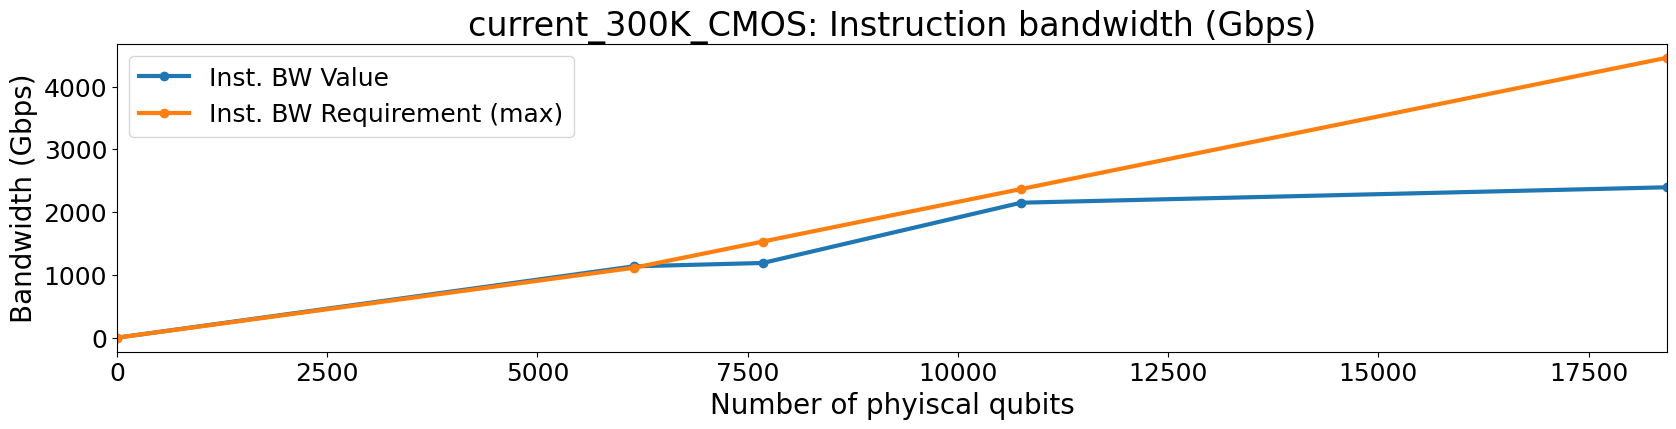

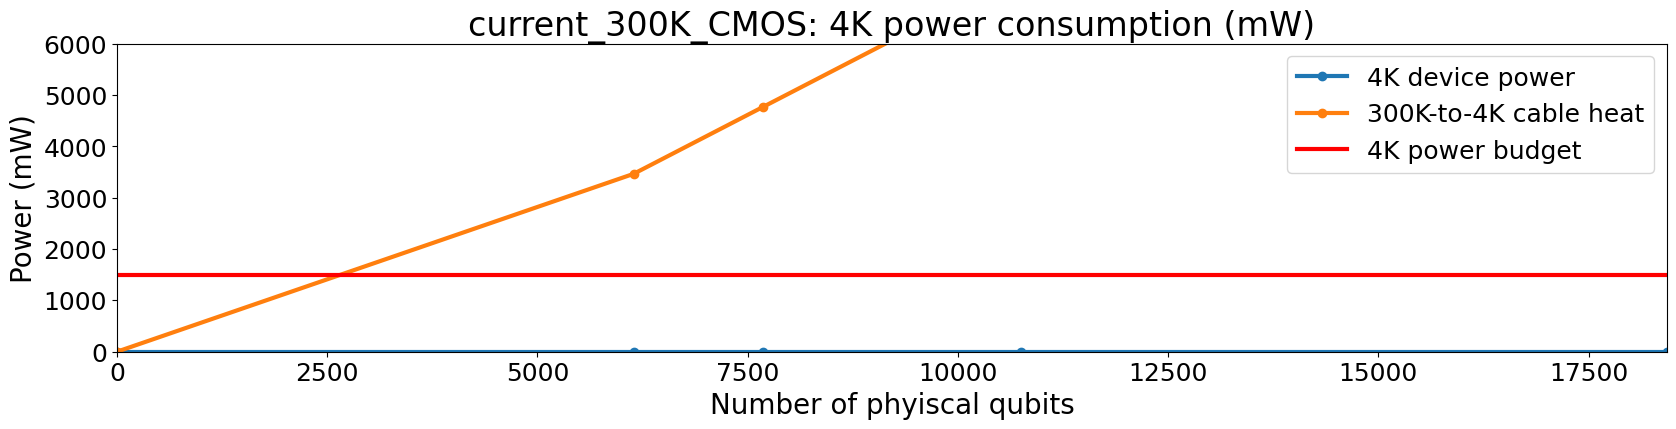

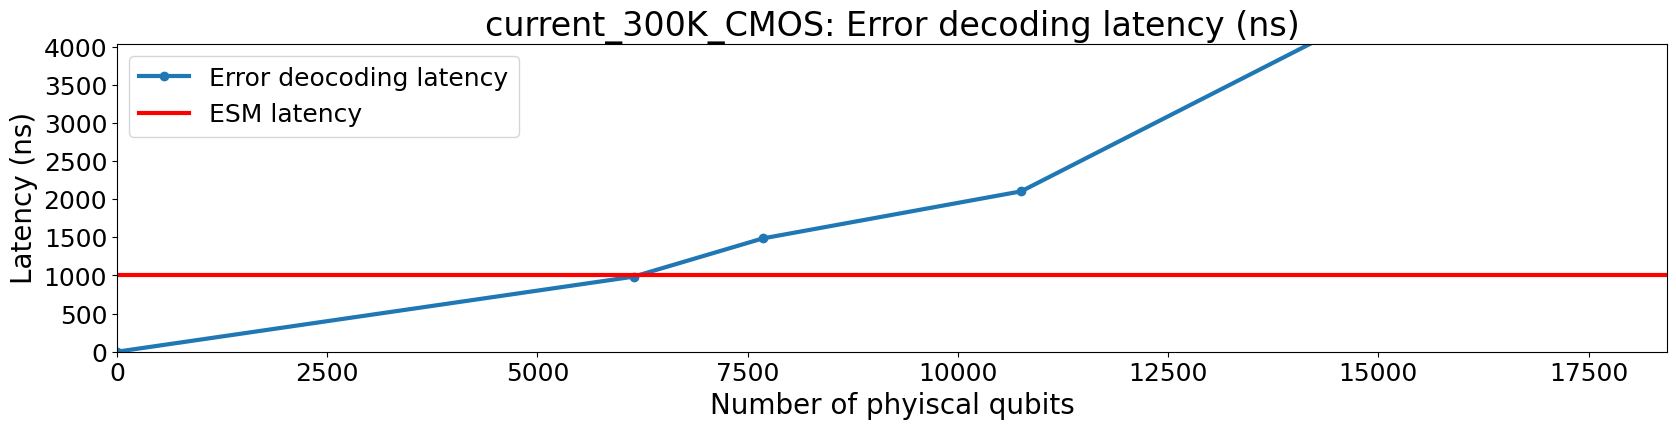

In [4]:
draw_simres_scaling(simres_list, config)

### Scalaibility analysis

* **Manageable qubit scale**
    * ~2500 physical qubits
* **Scalabilty bottleneck**  
    * Power consumption at 4K (300K-to-4K cable heat)
* **Next design guideline**
    * Move data-transfer dominating units (PSU, TCU) to 4K.
* **Note**
    * In the current version, the fast EDU microarchitecture takes four cycles per token setup due to the pipelining overhead (for achieving ~1 GHz operation). With some microarchitecture optimizations (e.g., fast sliding), we can remove the pipelining overhead (i.e., 1-cycle token setup) and thus reduce the error decoding latency. 

## 2. Near-future system with 4K CMOS 
* **Configuration - nearfuture_4K_CMOS**

### Run XQsim

In [5]:
config = "nearfuture_4K_CMOS"

simres_list = []
for qbin in qbin_list:
    framework.setup(config = config, 
                    qbin = qbin,
                    num_shots = 0, 
                    dump_synth = False,
                    regen_synth = False,
                    dump_est = False, 
                    regen_est = False, 
                    dump_sim = False, 
                    regen_sim = False, 
                    skip_pqsim = True,
                    debug = False
                    )
    xqsim_res, _ = framework.run()
    simres_list.append(xqsim_res)

### Visualize scalability metrics vs. scalability constraints

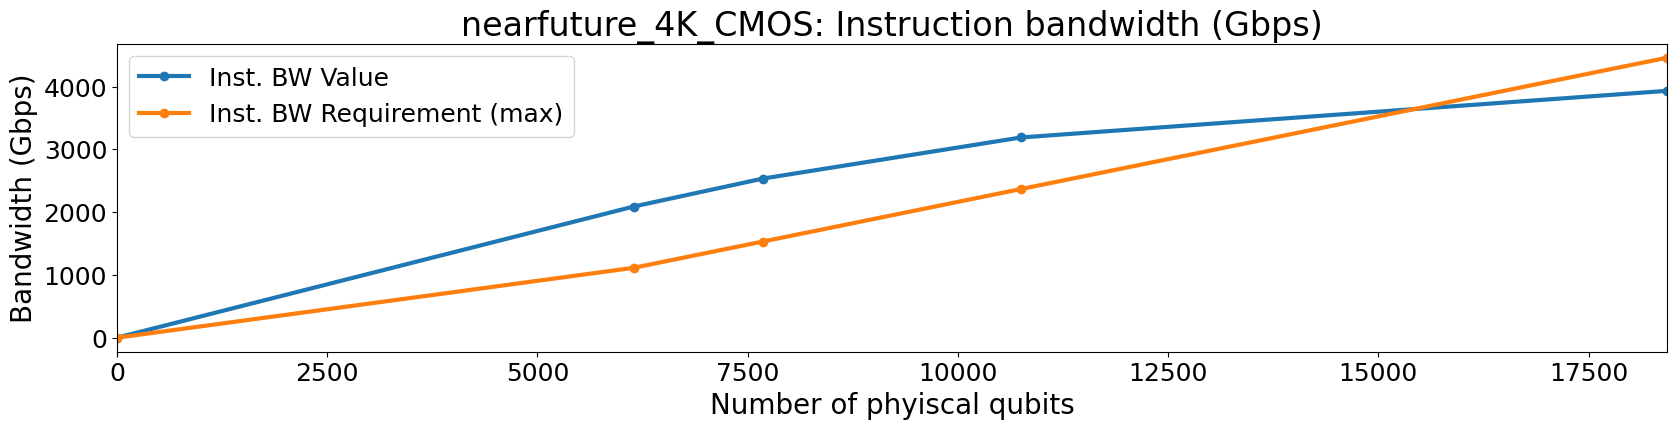

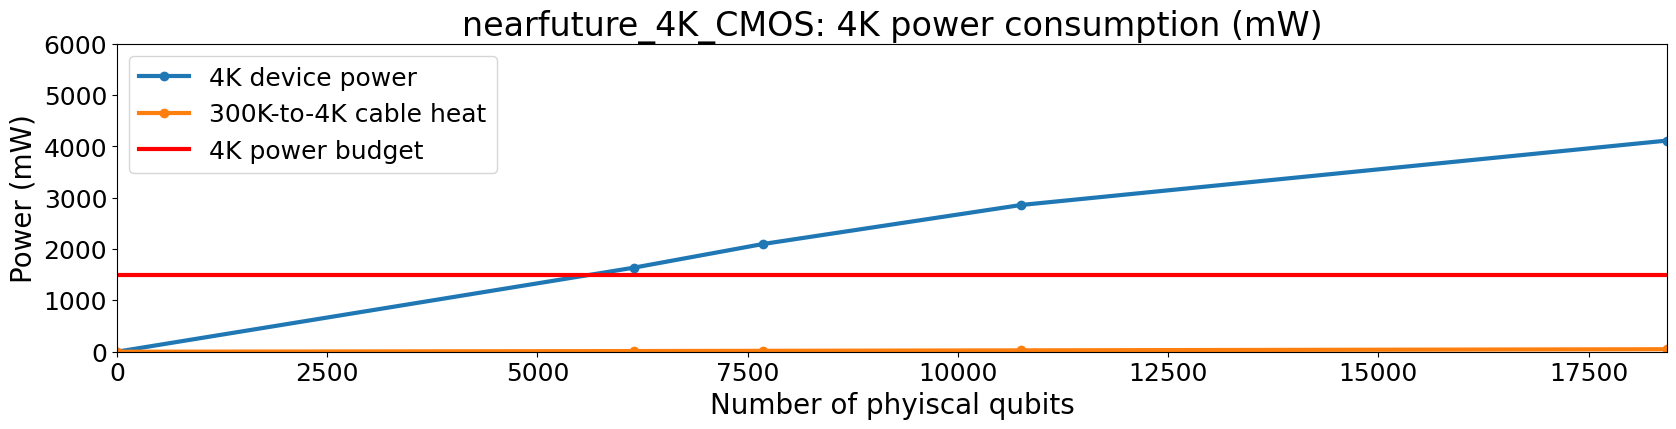

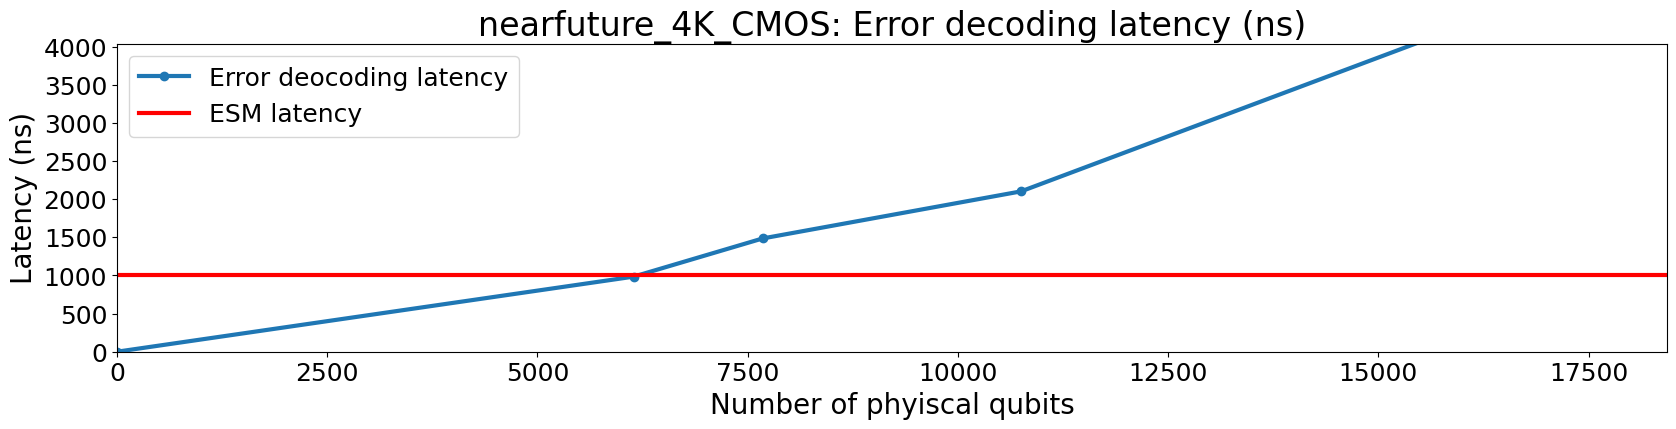

In [6]:
draw_simres_scaling(simres_list, config)

### Scalaibility analysis

* **Manageable qubit scale**
    * ~5500 physical qubits
* **Scalabilty bottleneck**  
    * Power consumption at 4K (4K device power)
    * Error decoding latency
* **Next design guideline**
    * Reduce device power consumption at 4K
    * Design much faster EDU
* **Note**
    * With the RTL-level engineering, we reduce the power consumption of PSU and TCU in the current version.
    * The above near-future 4K CMOS case study is quite conservative. First, as mentioned earlier, the analyzed 4K device power is a maximum value that does not consider the hardware activation ratio. Second, the above result does not assume voltage scaling, which will be enabled at 4K (please check the nearfuture_4K_CMOS_Vopt configuration).
    * On the other hand, this system's error decoding latency will limit the scalability to ~6000 physical qubits, even if it consumes much lower power at 4K. 

## 3. Near-future system with 4K RSFQ
* **Configuration - nearfuture_4K_RSFQ**

### Run XQsim

In [7]:
config = "nearfuture_4K_RSFQ"

simres_list = []
for qbin in qbin_list:
    print("qbin: ", qbin)
    framework.setup(config = config, 
                    qbin = qbin,
                    num_shots = 0, 
                    dump_synth = False,
                    regen_synth = False,
                    dump_est = False, 
                    regen_est = False, 
                    dump_sim = False, 
                    regen_sim = False, 
                    skip_pqsim = True,
                    debug = False
                    )
    xqsim_res, _ = framework.run()
    simres_list.append(xqsim_res)

qbin:  esm_n3
qbin:  esm_n5
qbin:  esm_n9
qbin:  esm_n19


### Visualize scalability metrics vs. scalability constraints

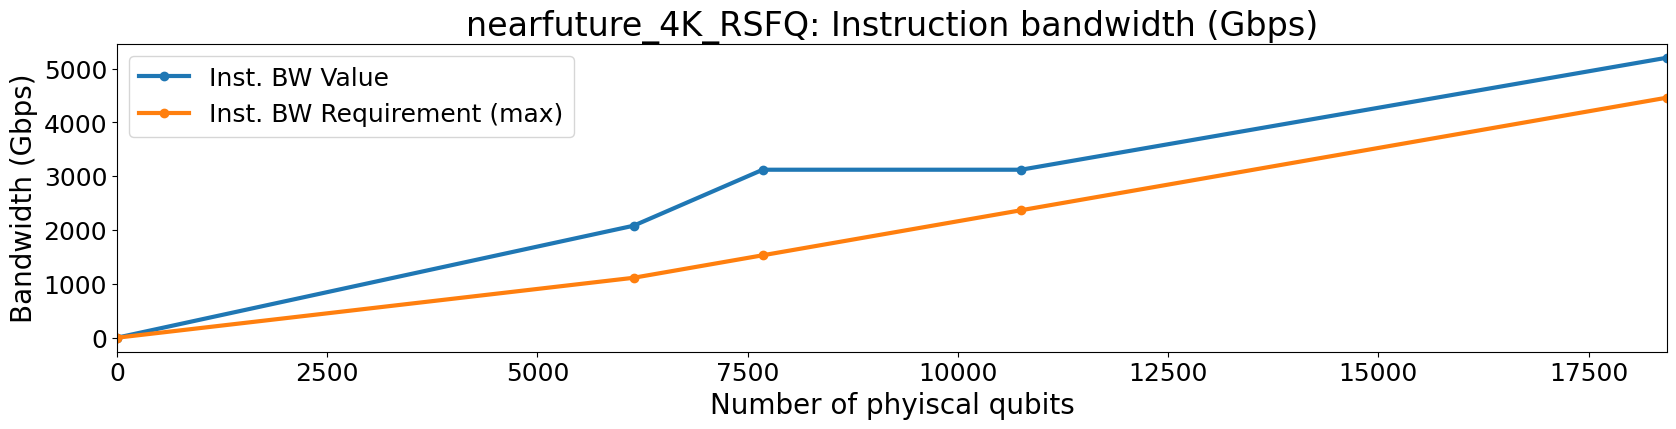

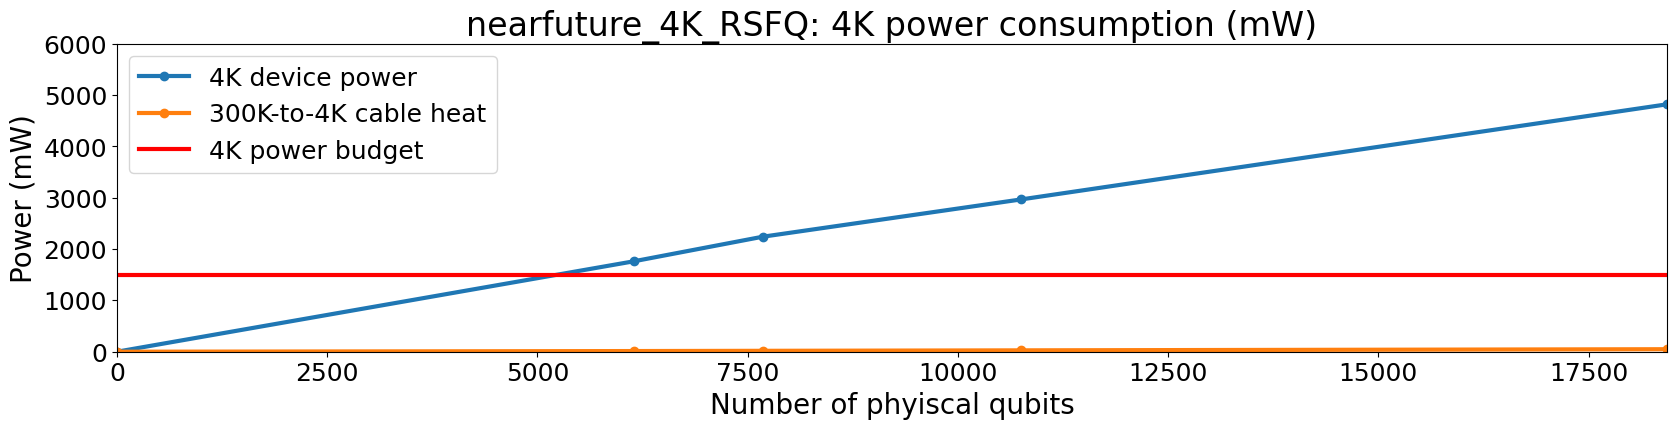

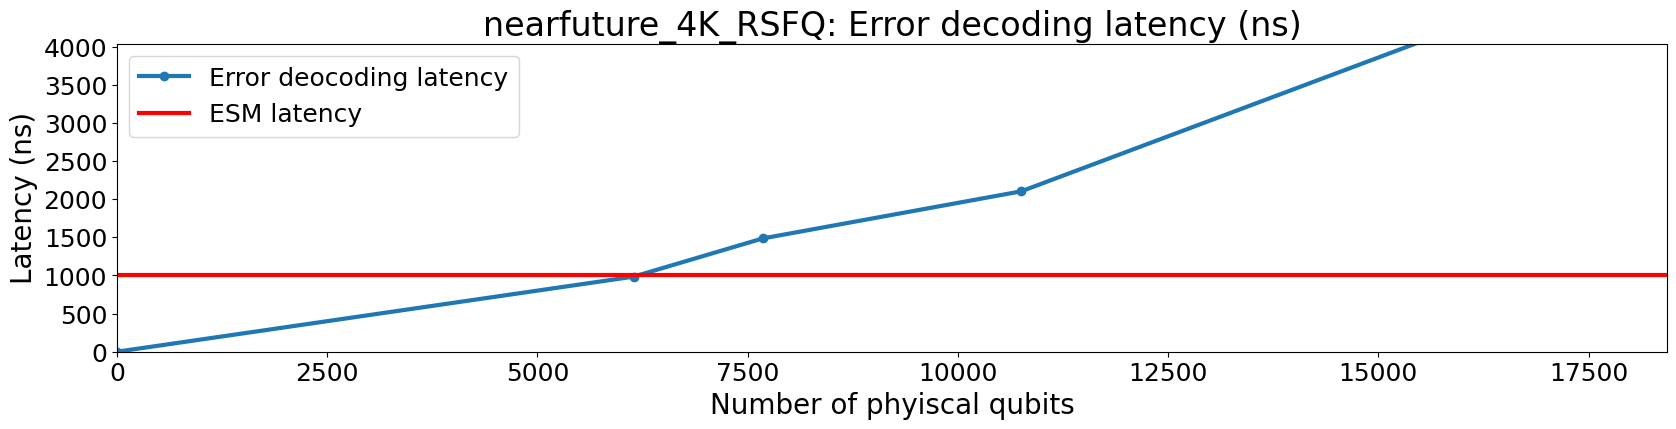

In [8]:
draw_simres_scaling(simres_list, config)

### Scalaibility analysis

* **Manageable qubit scale**
    * ~5200 physical qubits
* **Scalabilty bottleneck**  
    * Power consumption at 4K (4K device power)
    * Error decoding latency
* **Next design guideline**
    * Reduce device power consumption at 4K
    * Design much faster EDU

## 4. Future system with 4K ERSFQ
* **Configuration - future_4K_ERSFQ**

### Run XQsim

In [9]:
config = "future_4K_ERSFQ"

simres_list = []
for qbin in qbin_list:
    framework.setup(config = config, 
                    qbin = qbin,
                    num_shots = 0, 
                    dump_synth = False,
                    regen_synth = False,
                    dump_est = False, 
                    regen_est = False, 
                    dump_sim = False, 
                    regen_sim = False, 
                    skip_pqsim = True,
                    debug = False
                    )
    xqsim_res, _ = framework.run()
    simres_list.append(xqsim_res)

### Visualize scalability metrics vs. scalability constraints

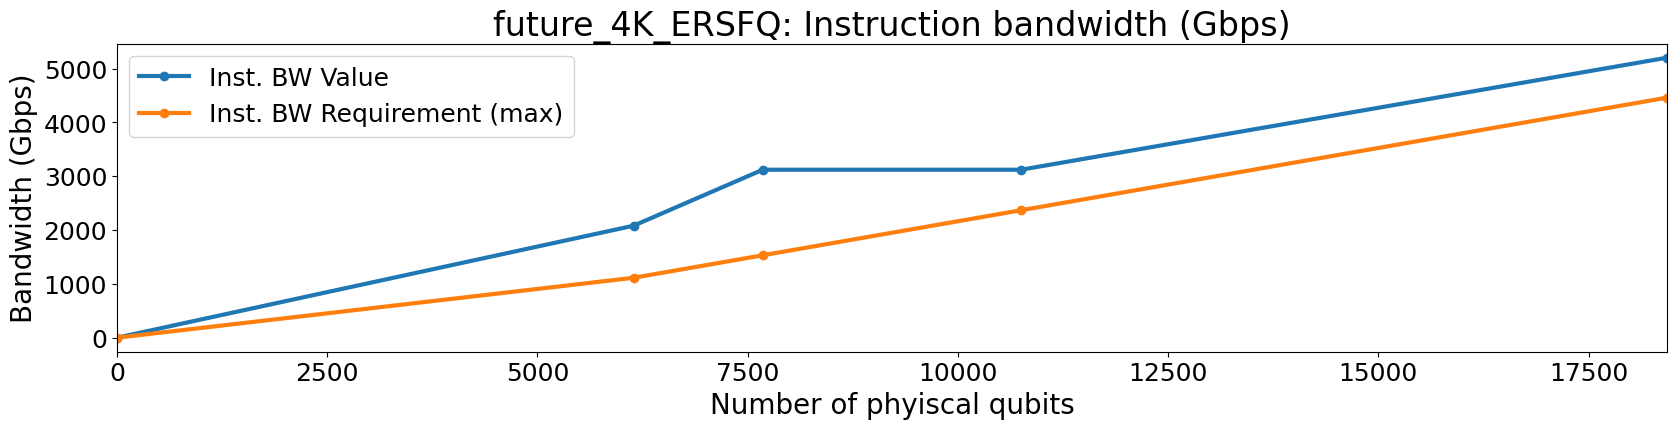

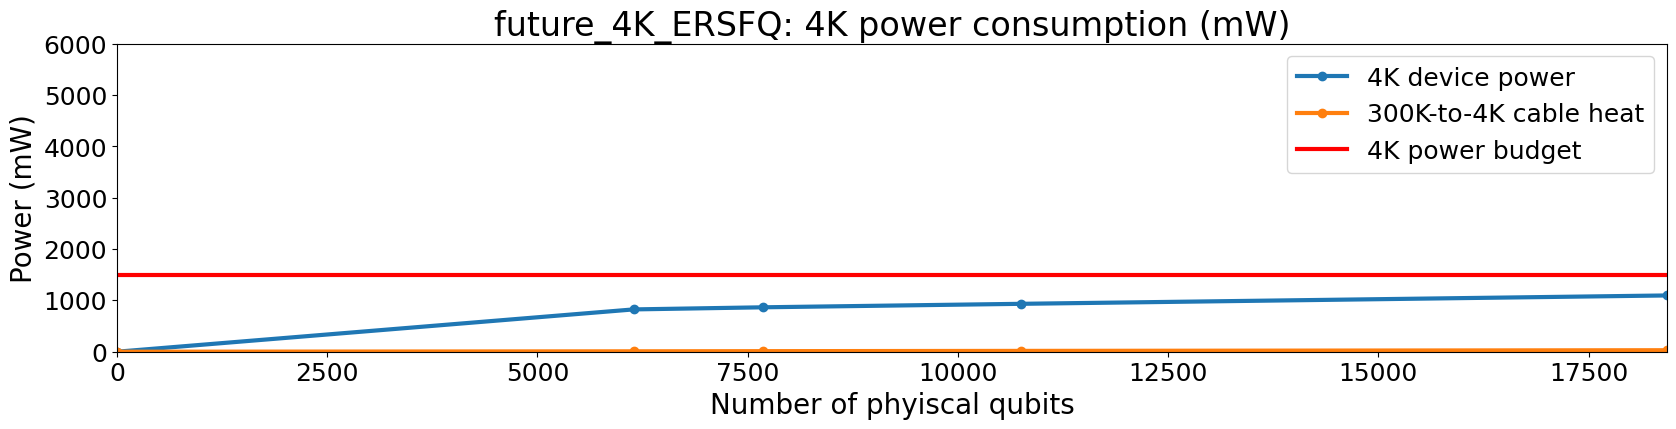

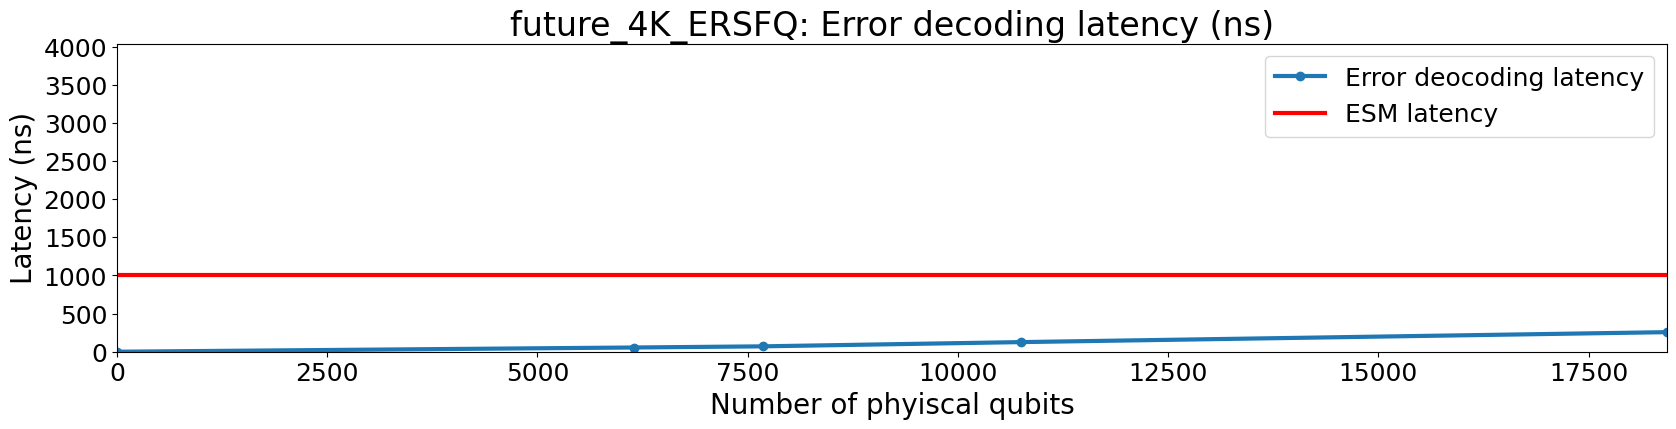

In [10]:
draw_simres_scaling(simres_list, config)

### Scalaibility analysis

* **Manageable qubit scale**
    * $>$ 40,000 physical qubits
* **Scalabilty bottleneck**  
    * Power consumption at 4K (4K device power)
* **Next design guideline**
    * Reduce device power consumption at 4K
* **Note**
    * With the improved SFQ model, the crurent version reports the clock freuquency of ~30 GHz for the 4K SFQ circuits.
